<a href="https://colab.research.google.com/github/Chia-Yin-Lee/fake-review-on-amazon-prac-/blob/main/fake_review_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title connect google drive folder

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SMU_MITB_AML/archive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SMU_MITB_AML/archive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [5]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [6]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [10]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [11]:
df['text_'] = df['text_'].astype(str)

In [8]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [15]:
df['text_'] = df['text_'].apply(preprocess)

In [16]:
df['text_'] = df['text_'].str.lower()

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
#df['text_'] = df['text_'].apply(lambda x: stem_words(x))
ama_df_text = ama_df_text.apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
#df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))
ama_df_text = ama_df_text.apply(lambda text: lemmatize_words(text))

In [3]:
ama_df_text.to_csv('Preprocessed AMZN Fake Reviews Dataset.csv')

NameError: ignored

In [28]:
ama_df_text.head()

0    witti littl book make son laugh loud recit car...
1    i rememb see show air televis year ago i child...
2    beetlejuic well written movi ..... everyth exc...
3    a twist rumplestiskin captur film star michael...
4    a twist rumplestiskin captur film star michael...
Name: Text, dtype: object

# Second Part

In [9]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.dropna(inplace=True)
df['length'] = df['text_'].apply(len)

In [12]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
bow_transformer = CountVectorizer(analyzer=text_process)

bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34441


In [14]:
bow_reviews = bow_transformer.transform(df['text_'])

In [15]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

pipelineSVC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [16]:
pipelineSVC.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f2368a396c0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [17]:
pipelineSVC.fit(review_train,label_train)

svc_pred = pipelineSVC.predict(review_test)

print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.87      0.88      7083
          OR       0.87      0.90      0.88      7068

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix: [[6128  955]
 [ 706 6362]]
Accuracy Score: 0.882623136174122
Model Prediction Accuracy: 88.26%


In [18]:
import pickle
pickle.dump(pipelineSVC, open('pipelineSVC.pkl', 'wb'))


In [19]:
pipelineLR = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])
pipelineLR.fit(review_train,label_train)

lr_pred = pipelineLR.predict(review_test)

print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.88      0.85      0.86      7083
          OR       0.86      0.88      0.87      7068

    accuracy                           0.87     14151
   macro avg       0.87      0.87      0.87     14151
weighted avg       0.87      0.87      0.87     14151

Confusion Matrix: [[6039 1044]
 [ 859 6209]]
Accuracy Score: 0.8655218712458483
Model Prediction Accuracy: 86.55%


In [20]:
pickle.dump(pipelineLR, open('pipelineLR.pkl', 'wb'))


In [21]:
ama_df = pd.read_csv('clean_df.csv')
ama_df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,inconsistent_name,time_delta,nameProvided,User_five_star_only,User_one_star_only,Summary_word_count,Text_word_count
0,0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,5,1999-10-08,EVERY book is educational,this witty little book makes my son laugh at l...,0,0.0,1,1,0,4,74
1,1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,1999-10-25,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,0,0.0,1,1,0,12,78
2,2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,5,1999-12-02,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,0,0.0,1,1,0,2,29
3,3,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,5,1999-12-06,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",1,0.0,1,1,0,5,36
4,4,451878,B00004CXX9,A344SMIA5JECGM,Vincent P. Ross,1,2,5,1999-12-06,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",1,0.0,1,1,0,5,36


In [22]:
ama_df_text = ama_df['Text']

In [23]:
ama_df_text

0         this witty little book makes my son laugh at l...
1         I can remember seeing the show when it aired o...
2         Beetlejuice is a well written movie ..... ever...
3         A twist of rumplestiskin captured on film, sta...
4         A twist of rumplestiskin captured on film, sta...
                                ...                        
568449    The only reason I am giving it 4 stars instead...
568450    Very pleased with the quality of the espresso....
568451    I just love it, and I am Not a major Indian co...
568452    I enjoy drinking this in a greek yogurt smooth...
568453    Aside from a non-flashy name, this is a great ...
Name: Text, Length: 568454, dtype: object

In [ ]:
ama_df_text = ama_df_text.astype(str)
ama_df_text = ama_df_text.apply(preprocess)
ama_df_text = ama_df_text.str.lower()

In [23]:
ama_df_text=pd.read_csv('Preprocessed AMZN Fake Reviews Dataset.csv')
ama_df_text.drop('Unnamed: 0',axis=1,inplace=True)
ama_df_text

,Text
0,witti littl book make son laugh loud recit car...
1,i rememb see show air televis year ago i child...
2,beetlejuic well written movi ..... everyth exc...
3,a twist rumplestiskin captur film star michael...
4,a twist rumplestiskin captur film star michael...
...,...
568449,the reason i give star instead star strang des...
568450,veri plea qualiti espresso the pod sturdi enou...
568451,i love i not major indian cook fan -- enough r...
568452,i enjoy drink greek yogurt smoothi morn i use ...


In [36]:
ama_df_text = ama_df_text.fillna('a')

In [38]:
AMZN_svc_pred = pipelineSVC.predict(ama_df_text['Text'])

In [39]:
AMZN_svc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'OR', 'OR'], dtype=object)

In [40]:
AMZN_svc_pred_df = pd.DataFrame(AMZN_svc_pred, columns = ['AMZN_svc_pred'])


In [41]:
AMZN_svc_pred_df.to_csv('AMZN_svc_pred.csv', index=False)

In [42]:
AMZN_lr_pred = pipelineLR.predict(ama_df_text['Text'])

In [43]:
AMZN_lr_pred_df = pd.DataFrame(AMZN_lr_pred, columns = ['AMZN_lr_pred'])

AMZN_lr_pred_df.to_csv('AMZN_lr_pred.csv', index=False)

In [45]:
AMZN_lr_pred_df

,AMZN_lr_pred
0,OR
1,OR
2,CG
3,OR
4,OR
...,...
568449,OR
568450,OR
568451,OR
568452,OR


In [63]:
cluster_df=pd.read_csv('clustercol.csv')
cluster_df.drop('Unnamed: 0',axis=1,inplace=True)
cluster_df

,cluster
0,1
1,1
2,1
3,17
4,17
...,...
568449,11
568450,17
568451,5
568452,1


In [65]:
cluster_df['cluster'].value_counts()

1     105661
12     83526
10     78659
6      57910
17     55501
5      32628
2      22395
11     21522
7      18680
0      12767
16     11932
3      11753
9      10990
15     10324
8       9671
4       8948
13      8856
14      6731
Name: cluster, dtype: int64

In [47]:
con_df = pd.concat([AMZN_svc_pred_df, AMZN_lr_pred_df, cluster_df], axis=1)
con_df

,AMZN_svc_pred,AMZN_lr_pred,cluster
0,OR,OR,1
1,OR,OR,1
2,CG,CG,1
3,OR,OR,17
4,OR,OR,17
...,...,...,...
568449,OR,OR,11
568450,OR,OR,17
568451,OR,OR,5
568452,OR,OR,1


In [49]:
con_df.to_csv('AMZN_pred.csv')

In [67]:
data=pd.read_csv('AMZN_pred.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,AMZN_svc_pred,AMZN_lr_pred,cluster
0,OR,OR,1
1,OR,OR,1
2,CG,CG,1
3,OR,OR,17
4,OR,OR,17
...,...,...,...
568449,OR,OR,11
568450,OR,OR,17
568451,OR,OR,5
568452,OR,OR,1


In [48]:
#grouped = con_df.groupby(['AMZN_svc_pred', 'AMZN_lr_pred'])['cluster'].count().reset_index()
grouped = con_df.groupby(['AMZN_svc_pred', 'AMZN_lr_pred'])
group_fake = grouped.get_group(('CG', 'CG')).reset_index()
group_fake

,index,AMZN_svc_pred,AMZN_lr_pred,cluster
0,2,CG,CG,1
1,6,CG,CG,1
2,24,CG,CG,11
3,88,CG,CG,17
4,89,CG,CG,17
...,...,...,...,...
17833,568284,CG,CG,17
17834,568300,CG,CG,17
17835,568372,CG,CG,6
17836,568380,CG,CG,5


In [68]:
# Compute count of OR and CG within the SVM predicted column
svm_counts = data.groupby(['cluster', 'AMZN_svc_pred']).size().unstack(fill_value=0)
svm_counts.columns = ['SVM_CG_Count', 'SVM_OR_Count']

# Compute count of OR and CG within the logistic regression predicted column
logreg_counts = data.groupby(['cluster', 'AMZN_lr_pred']).size().unstack(fill_value=0)
logreg_counts.columns = ['LogReg_CG_Count', 'LogReg_OR_Count']

# Merge the counts for SVM and logistic regression predictions
result = pd.concat([svm_counts, logreg_counts], axis=1)

# Compute proportion of OR and CG within each cluster and each model
result['SVM_CG_Proportion'] = result['SVM_CG_Count'] / (result['SVM_OR_Count'] + result['SVM_CG_Count'])
result['SVM_OR_Proportion'] = result['SVM_OR_Count'] / (result['SVM_OR_Count'] + result['SVM_CG_Count'])
result['LogReg_CG_Proportion'] = result['LogReg_CG_Count'] / (result['LogReg_OR_Count'] + result['LogReg_CG_Count'])
result['LogReg_OR_Proportion'] = result['LogReg_OR_Count'] / (result['LogReg_OR_Count'] + result['LogReg_CG_Count'])

# Rank the cluster/model pairs by the highest proportion of CG
sorted_result = result.sort_values('SVM_CG_Proportion', ascending=False)
sorted_result

,SVM_CG_Count,SVM_OR_Count,LogReg_CG_Count,LogReg_OR_Count,SVM_CG_Proportion,SVM_OR_Proportion,LogReg_CG_Proportion,LogReg_OR_Proportion
cluster,,,,,,,,
3,694,11059,949,10804,0.059049,0.940951,0.080745,0.919255
17,2716,52785,3738,51763,0.048936,0.951064,0.067350,0.932650
12,3662,79864,4716,78810,0.043843,0.956157,0.056461,0.943539
1,3923,101738,5216,100445,0.037128,0.962872,0.049365,0.950635
16,425,11507,543,11389,0.035619,0.964381,0.045508,0.954492
7,636,18044,855,17825,0.034047,0.965953,0.045771,0.954229
10,2522,76137,3438,75221,0.032062,0.967938,0.043708,0.956292
11,643,20879,911,20611,0.029876,0.970124,0.042329,0.957671
5,894,31734,1289,31339,0.027400,0.972600,0.039506,0.960494


In [69]:
result['Cluster'] = result.reset_index().index + 1
sorted_result = result.sort_values('LogReg_CG_Proportion', ascending=False)

sorted_result

,SVM_CG_Count,SVM_OR_Count,LogReg_CG_Count,LogReg_OR_Count,SVM_CG_Proportion,SVM_OR_Proportion,LogReg_CG_Proportion,LogReg_OR_Proportion,Cluster
cluster,,,,,,,,,
3,694,11059,949,10804,0.059049,0.940951,0.080745,0.919255,4
17,2716,52785,3738,51763,0.048936,0.951064,0.067350,0.932650,18
12,3662,79864,4716,78810,0.043843,0.956157,0.056461,0.943539,13
1,3923,101738,5216,100445,0.037128,0.962872,0.049365,0.950635,2
7,636,18044,855,17825,0.034047,0.965953,0.045771,0.954229,8
0,337,12430,584,12183,0.026396,0.973604,0.045743,0.954257,1
16,425,11507,543,11389,0.035619,0.964381,0.045508,0.954492,17
10,2522,76137,3438,75221,0.032062,0.967938,0.043708,0.956292,11
11,643,20879,911,20611,0.029876,0.970124,0.042329,0.957671,12


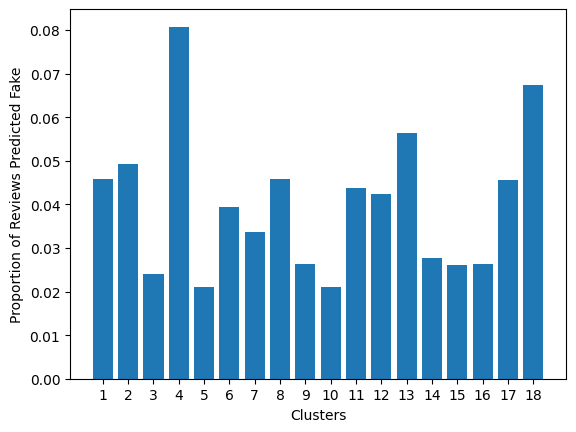

In [70]:
x_values = sorted_result['Cluster']
y_values = sorted_result['LogReg_CG_Proportion']
x_ticks = np.arange(0, 18, 1) + 1
x_labels = x_ticks.astype(str)

# Plot the bar chart
plt.bar(x_values, y_values)

# Add labels and title to the chart
plt.xlabel('Clusters')
plt.ylabel('Proportion of Reviews Predicted Fake')
plt.xticks(x_ticks, x_labels)

# Show the plot
plt.show()

In [ ]:
#@title clean_text_billy
import re

re_space = re.compile('[/(){}\[\]\|@,;]')

re_symbols = re.compile('[^0-9a-z #+_]')

STOPWORDS = set(stopwords.words('english'))

def clean_text_billy(text):

    text = text.lower()

    text = re_space.sub(' ', text)

    text = re_symbols.sub('', text)

    text = ' '.join(word for word in text.split() if word not in STOPWORDS)

    return text




ama_df_text = ama_df_text['Text'].apply(clean_text_billy)